# Summary by group

### The following table records the salary and years of experience of 10 employees.

In [2]:
from IPython.display import HTML, display
import tabulate
table = [("Salary","Years of Experience"),(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Salary,Years of Experience
83000,8.7
88000,8.1
48000,0.7
76000,6
69000,6.5
76000,7.5
60000,2.5
83000,10
48000,1.9
63000,4.2


### We are going to do the followings:
### (i) Scatter plot the salary and years of experience. Do you spot any relationship between the two variables?
### (ii) Calculate average salary grouped by year of experience.
### (iii) Because the result is not useful, we consider another approach. Group the data according to whether years of experience is less than 2, less than 5 or else.
### (iv) Calculate the average salary per grouping in (iii).

In [3]:
from matplotlib import pyplot as plt
from collections import defaultdict

In [4]:
salaries_and_yr_of_exp = [(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]

Text(0, 0.5, 'Salary')

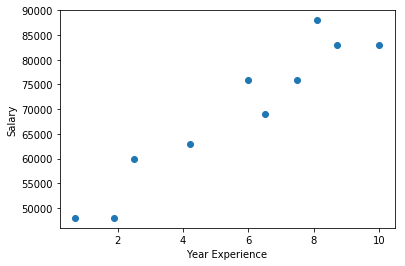

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter([y for x,y in salaries_and_yr_of_exp],[x for x,y in salaries_and_yr_of_exp])
plt.xlabel('Year Experience')
plt.ylabel('Salary')

In [6]:
salary_by_yr_of_exp = defaultdict(list)
for salary, year in salaries_and_yr_of_exp:
    salary_by_yr_of_exp[year].append(salary)

In [7]:
# keys are years, each value is average salary for that tenure
average_salary_by_yr_of_exp = {
year : sum(salaries) / len(salaries) for year, salaries in salary_by_yr_of_exp.items()
}

In [8]:
list(average_salary_by_yr_of_exp.items())

[(8.7, 83000.0),
 (8.1, 88000.0),
 (0.7, 48000.0),
 (6, 76000.0),
 (6.5, 69000.0),
 (7.5, 76000.0),
 (2.5, 60000.0),
 (10, 83000.0),
 (1.9, 48000.0),
 (4.2, 63000.0)]

### not useful because of continuous scale

In [9]:
def year_bucket(year):
    if year < 2:
        return "less than two"
    elif year < 5:
        return "between two and five"
    else:
        return "more than five"

In [10]:
salary_by_year_bucket = defaultdict(list)
for salary, year in salaries_and_yr_of_exp:
    bucket = year_bucket(year)
    salary_by_year_bucket[bucket].append(salary)

In [11]:
average_salary_by_bucket = {
year_bucket : sum(salaries) / len(salaries)
for year_bucket, salaries in salary_by_year_bucket.items()
}

In [12]:
list(average_salary_by_bucket.items())

[('more than five', 79166.66666666667),
 ('less than two', 48000.0),
 ('between two and five', 61500.0)]